#**Fully Connected Neural Network:**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings


warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.simplefilter(action='ignore', category=FutureWarning)

Load dataset

In [ ]:
train_df = pd.read_csv("/content/Weather_Training_Data[1].csv")
test_df = pd.read_csv('/content/Weather_Test_Data[1].csv')

Concatenating the training and testing data for preprocessing

In [ ]:
df = pd.concat([train_df, test_df])

##**Data Preprocessing:**

In [ ]:
df.shape

(142193, 23)

In [ ]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,99516.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224677
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417372
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


Check null values

In [ ]:
df.isnull().sum()

row ID               0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow     42677
dtype: int64

Let's check datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 42676
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   row ID         142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   flo

Approx 50 percent of the Evaporation column data is null, therefore instead of filling mean I dropped the null values

In [ ]:
df = df.dropna(subset = ['Evaporation'])

Drop unnecessay columns

In [ ]:
df.drop(['row ID', 'Location'], inplace=True, axis=1)

Transforming the target variable categories to numeric form

In [ ]:
df['RainToday'].value_counts()

RainToday
No     63297
Yes    17796
Name: count, dtype: int64

In [ ]:
df = df.dropna(subset = ['RainToday'])
df['RainToday'] = df['RainToday'].map({'Yes' : 1, 'No': 0})

Handle null values by filling mean in numeric columns and mode in
categorical column

In [ ]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['object'])

for col in df.columns:
  if col in numerical_col:
    df[col].fillna(df[col].mean(), inplace = True)
  elif col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

All the columns are equals

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81093 entries, 4183 to 42195
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        81093 non-null  float64
 1   MaxTemp        81093 non-null  float64
 2   Rainfall       81093 non-null  float64
 3   Evaporation    81093 non-null  float64
 4   Sunshine       81093 non-null  float64
 5   WindGustDir    81093 non-null  object 
 6   WindGustSpeed  81093 non-null  float64
 7   WindDir9am     81093 non-null  object 
 8   WindDir3pm     81093 non-null  object 
 9   WindSpeed9am   81093 non-null  float64
 10  WindSpeed3pm   81093 non-null  float64
 11  Humidity9am    81093 non-null  float64
 12  Humidity3pm    81093 non-null  float64
 13  Pressure9am    81093 non-null  float64
 14  Pressure3pm    81093 non-null  float64
 15  Cloud9am       81093 non-null  float64
 16  Cloud3pm       81093 non-null  float64
 17  Temp9am        81093 non-null  float64
 18  Temp3pm 

Handle categorical columns with OneHotEncoding

In [ ]:
WindGustDir = pd.get_dummies(df['WindGustDir'], drop_first=True)
WindDir9am = pd.get_dummies(df['WindDir9am'], drop_first=True)
WindDir3pm = pd.get_dummies(df['WindDir3pm'], drop_first=True)

In [ ]:
df = pd.concat([df, WindGustDir, WindDir9am, WindDir3pm], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
4183,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.000000,...,False,False,False,False,False,False,True,False,False,False
4184,15.5,34.1,0.0,12.6,13.3,SE,30.0,N,N,14.703081,...,False,False,False,False,False,False,False,False,False,False
4185,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,7.000000,...,False,False,False,False,False,False,False,False,True,False
4186,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.000000,...,False,False,False,False,True,False,False,False,False,False
4187,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,15.000000,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
4183,17.9,35.2,0.0,12.0,12.3,48.0,6.000000,20.0,20.000000,13.0,...,False,False,False,False,False,False,True,False,False,False
4184,15.5,34.1,0.0,12.6,13.3,30.0,14.703081,7.0,66.849616,7.0,...,False,False,False,False,False,False,False,False,False,False
4185,27.1,36.1,0.0,13.0,0.0,43.0,7.000000,20.0,26.000000,19.0,...,False,False,False,False,False,False,False,False,True,False
4186,23.3,34.0,0.0,9.8,12.6,41.0,17.000000,19.0,33.000000,15.0,...,False,False,False,False,True,False,False,False,False,False
4187,16.1,34.2,0.0,14.6,13.2,37.0,15.000000,6.0,25.000000,9.0,...,False,False,True,False,False,False,False,False,False,False


Let see the shape and duplicates of data

In [ ]:
print("Shape: ", df.shape)
print("Duplicate values: ", df.duplicated().sum())

Shape:  (81093, 63)
Duplicate values:  0


Splitting the features to x and target variable to y

In [ ]:
# Features
x = df.drop('RainToday', axis=1)
# Target variable
y = df['RainToday']

For normalization we perform standard scaler method

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

x_transform = std_scaler.fit_transform(x)
y = y.values

Splitting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.2, random_state=101)

Building fully connected neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(400, input_dim = 62, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               25200     
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 33241 (129.85 KB)
Trainable params: 33241 (129.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=200, epochs=25, verbose=1)

Epoch 1/28
325/325 [==============================] - 3s 7ms/step - loss: 0.3953 - accuracy: 0.8301
Epoch 2/28
325/325 [==============================] - 2s 5ms/step - loss: 0.2917 - accuracy: 0.8840
Epoch 3/28
325/325 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.9052
Epoch 4/28
325/325 [==============================] - 1s 3ms/step - loss: 0.2116 - accuracy: 0.9206
Epoch 5/28
325/325 [==============================] - 1s 3ms/step - loss: 0.1856 - accuracy: 0.9319
Epoch 6/28
325/325 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9413
Epoch 7/28
325/325 [==============================] - 1s 4ms/step - loss: 0.1459 - accuracy: 0.9483
Epoch 8/28
325/325 [==============================] - 1s 3ms/step - loss: 0.1305 - accuracy: 0.9541
Epoch 9/28
325/325 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9590
Epoch 10/28
325/325 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9629

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Prediction probablities for the test data using trained model
y_pred_prob = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

test_accuracy = accuracy_score(y_pred, y_test)
print(f"\nTest Accuracy : {test_accuracy}")


Test Accuracy : 0.9847709476539861


Confusion Matrix

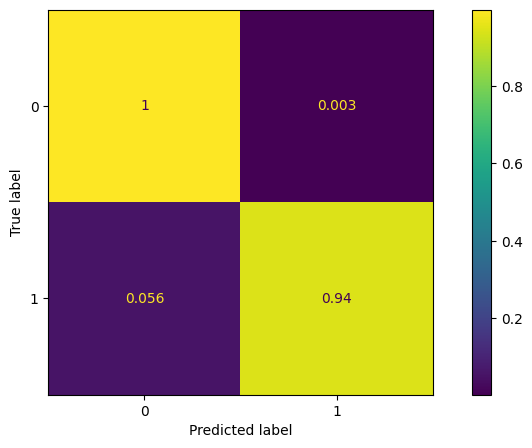

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.show()